Este notebook diz respeito ao treinamento de uma SVM com a finalidade de inferir melhores condições de lucros perceituais com respeito ao custo do produto. Os dados de treinamento estão contidos na pasta CSVLoja2, gerados a partir dos scrits anteriores, e tratam da evolução das transações com incremento de de lucro percentual de 10 a 300%. A máquina foi treinada de modo a reconhecer como lucro qualquer valor acima de 5000. Este sendo o único parâmetro alvo do treinamento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
folder = "C:/Users/sucod/OneDrive/Lenovo/Documentos/Sql/"

**Os dados utilizados no treinamento estão no seguinte DataFrame**

In [2]:
df = pd.DataFrame(columns = [], index = [])
for percent in range (10,301,10):
    df_aux = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/produto_{}.csv".format(percent))
    df_aux["lucroPercent"] = percent
    df = pd.concat([df, df_aux],ignore_index=True)

del df['Unnamed: 0']
del df['idProduto'] 
del df['prodEstoque']
del df['Departamento_idDepartamento']

df.head()

,prodValor,prodVendas,prodCusto,prodCustoAcum,prodGanhoAcum,prodLucro,lucroPercent
0,38.53,633,35.03,21193.10,24389.50,3196.340,10
1,41.23,554,37.48,22225.60,22841.40,615.781,10
2,50.24,526,45.67,25894.90,26426.20,531.352,10
3,4.47,1327,4.06,5436.34,5931.69,495.350,10
4,34.85,672,31.68,21289.00,23419.20,2130.240,10


**Definindo uma variável isLucro como sendo qualquer valor acima de 5000:**

In [3]:
df["isLucro"]=df["prodLucro"]>5000
df.head()

,prodValor,prodVendas,prodCusto,prodCustoAcum,prodGanhoAcum,prodLucro,lucroPercent,isLucro
0,38.53,633,35.03,21193.10,24389.50,3196.340,10,False
1,41.23,554,37.48,22225.60,22841.40,615.781,10,False
2,50.24,526,45.67,25894.90,26426.20,531.352,10,False
3,4.47,1327,4.06,5436.34,5931.69,495.350,10,False
4,34.85,672,31.68,21289.00,23419.20,2130.240,10,False


**A quantidade de valores que satisfazem a condição é:**

In [4]:
df["isLucro"].sum()

4147

**Os valores em laranja indicam os pontos de lucro total, e revelam certa clusterização dos mesmos. Boas variáveis independentes de interesse seriam o custo do produto e o lucro percentual, ou seja, como essas variáveis, as quais podem ser controladas, podem interferir no lucro final:**

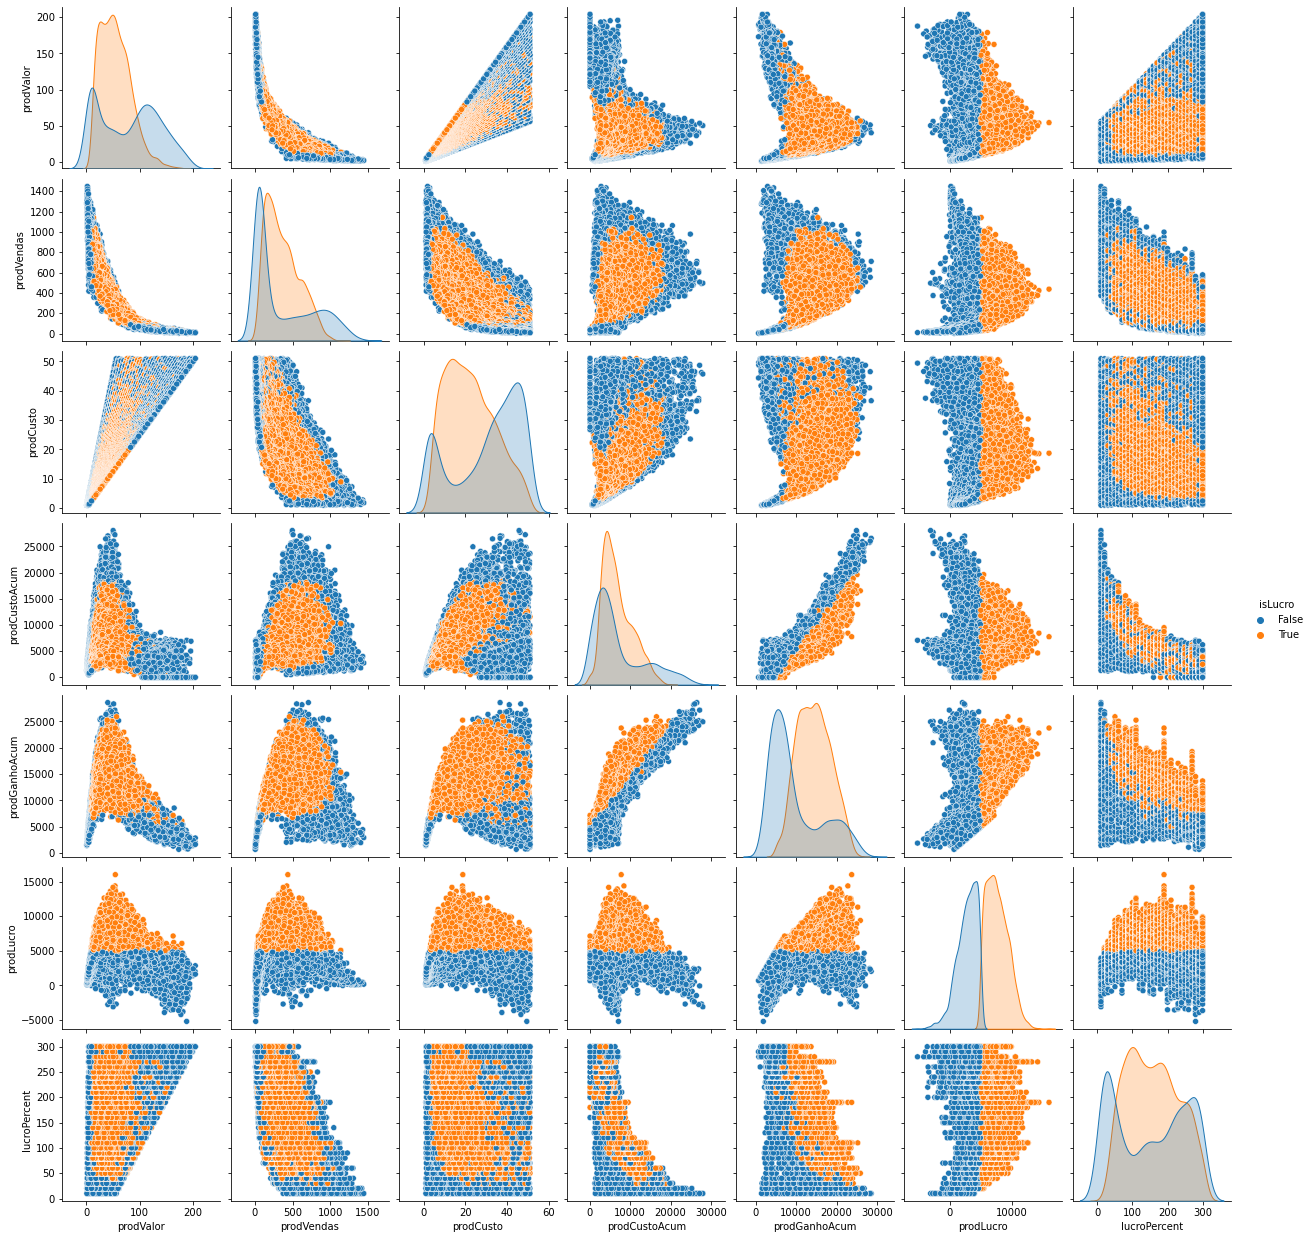

In [5]:
sns.pairplot(df,hue = "isLucro")

**Realizando um treinamento com configurações padrões da SVM, percebe-se boa dectação de verdadeiros positivos e negativos:**

In [6]:
X = df.drop('isLucro', axis = 1)
Y = df['isLucro']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

model = SVC()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

In [7]:
print(classification_report(Y_test, pred))
print('\n')
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1007
        True       0.99      0.99      0.99      1243

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250



[[1000    7]
 [  16 1227]]


In [8]:
######### ---------------- ##########

**O mesmo conjunto de atribuições, porem para uma definição de lucro como  >10000, não traz resultados tão desejáveis na detecção de verdadeiros positivos, mesmo otimizando os parâmetros da máquina:**

In [9]:
df = pd.DataFrame(columns = [], index = [])

for percent in range (10,301,10):
    df_aux = pd.read_csv(r"{}".format(folder)+"/CSVLoja2/produto_{}.csv".format(percent))
    df_aux["lucroPercent"] = percent
    df = pd.concat([df, df_aux],ignore_index=True)
    
del df['Unnamed: 0']
del df['idProduto'] 
del df['prodEstoque']
del df['Departamento_idDepartamento']

In [10]:
df["isLucro"]=df["prodLucro"]>10000
df.head()

,prodValor,prodVendas,prodCusto,prodCustoAcum,prodGanhoAcum,prodLucro,lucroPercent,isLucro
0,38.53,633,35.03,21193.10,24389.50,3196.340,10,False
1,41.23,554,37.48,22225.60,22841.40,615.781,10,False
2,50.24,526,45.67,25894.90,26426.20,531.352,10,False
3,4.47,1327,4.06,5436.34,5931.69,495.350,10,False
4,34.85,672,31.68,21289.00,23419.20,2130.240,10,False


In [11]:
X = df.drop(['isLucro','prodGanhoAcum','prodVendas','prodCustoAcum','prodValor','prodGanhoAcum','prodLucro'], axis = 1)
Y = df['isLucro']
X.head()

,prodCusto,lucroPercent
0,35.03,10
1,37.48,10
2,45.67,10
3,4.06,10
4,31.68,10


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose = 3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.552, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.553, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.552, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.553, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.553, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.553, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [13]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) 
model = SVC(C= 10, gamma= 0.0001, kernel= 'rbf')
model.fit(X_train, Y_train)

print(classification_report(Y_test, pred))
print('\n')
print(confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

       False       0.93      0.45      0.61      2113
        True       0.06      0.50      0.10       137

    accuracy                           0.45      2250
   macro avg       0.49      0.48      0.35      2250
weighted avg       0.88      0.45      0.58      2250



[[ 948 1165]
 [  68   69]]


**A partir da configuração da SVM sobre a aprendizagem dos dads fornecidos, pode-se construir uma função de inferência para o melhor lucro percentual com relação ao custo de produto, para o caso em que a detecção de verdadeiros positivos é precisa. Assim quando o custo é passado como parâmetro, ela realizará uma busca pelo maior lucro possível, descescendo de 300, que torne a predição verdadeira:**

In [15]:
def max_lucro(varcusto):
    x = 300
    while x>10:
        cond = model.predict(pd.DataFrame(data={'prodCusto': [varcusto], 'lucroPercent': [x]}))[0]
        if cond:
            return x
            break
        x-=1
        if x == 10:
            return 10

**Esta função está implementada no código do arquivo *start_loja_db_SVM.py*.**

***Nos próximos notebooks seguem melhorias na aprendizagem da SVM.***